### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.13.1'

### Collect Data

In [3]:
from tensorflow import keras

In [25]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()
train_labels = trainY

In [26]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [27]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [28]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

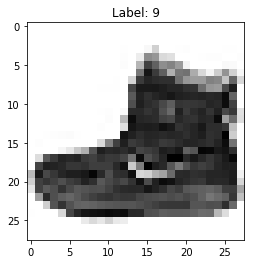

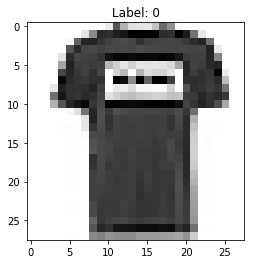

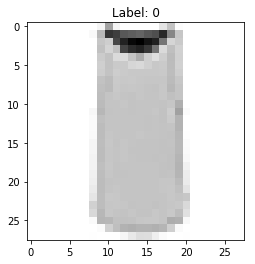

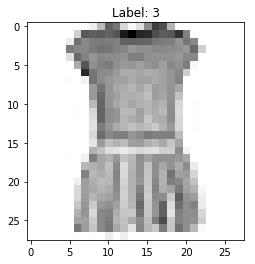

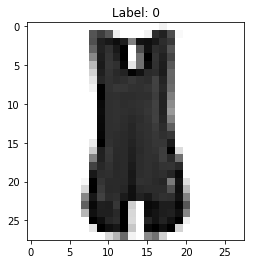

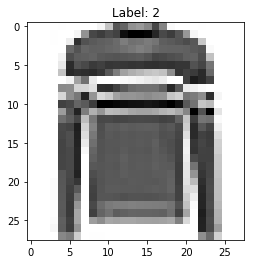

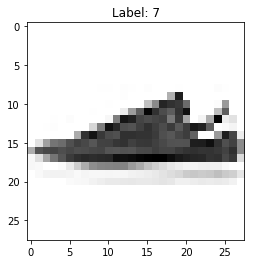

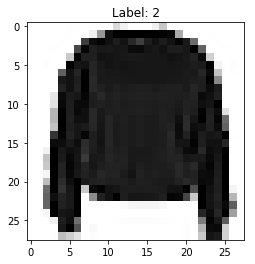

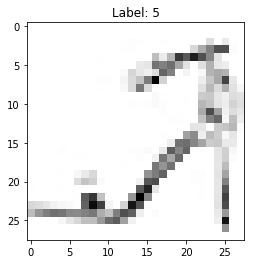

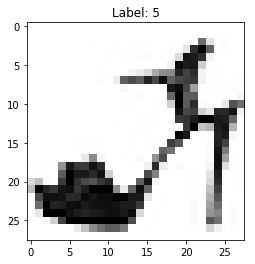

In [30]:
#Lets print the image as well
import matplotlib.pyplot as plt
    
for i in range(10):
    img = trainX[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.title("Label: " + str(train_labels[i]))
    plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [43]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [44]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=50,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 0s 7us/sample - loss: 14.8652 - acc: 0.0645 - val_loss: 12.1014 - val_acc: 0.2454
Epoch 2/50
60000/60000 [==============================] - 0s 5us/sample - loss: 12.0908 - acc: 0.2461 - val_loss: 12.5048 - val_acc: 0.2203
Epoch 3/50
60000/60000 [==============================] - 0s 4us/sample - loss: 12.5004 - acc: 0.2204 - val_loss: 12.8701 - val_acc: 0.2008
Epoch 4/50
60000/60000 [==============================] - 0s 4us/sample - loss: 12.8708 - acc: 0.2008 - val_loss: 12.8173 - val_acc: 0.2039
Epoch 5/50
60000/60000 [==============================] - 0s 4us/sample - loss: 12.8214 - acc: 0.2036 - val_loss: 12.6406 - val_acc: 0.2140
Epoch 6/50
60000/60000 [==============================] - 0s 4us/sample - loss: 12.6417 - acc: 0.2140 - val_loss: 11.5029 - val_acc: 0.2848
Epoch 7/50
60000/60000 [==============================] - 0s 4us/sample - loss: 11.4744 - acc: 0.2867 - val_lo

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [45]:
#Initialize Sequential model
model_batch = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model_batch.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model_batch.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model_batch.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model_batch.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [46]:
model_batch.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=50,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 15us/sample - loss: 2.9762 - acc: 0.0770 - val_loss: 11.4598 - val_acc: 0.1754
Epoch 2/50
60000/60000 [==============================] - 1s 11us/sample - loss: 2.6708 - acc: 0.1087 - val_loss: 9.6894 - val_acc: 0.1921
Epoch 3/50
60000/60000 [==============================] - 1s 11us/sample - loss: 2.4203 - acc: 0.1567 - val_loss: 7.8740 - val_acc: 0.2211
Epoch 4/50
60000/60000 [==============================] - 1s 11us/sample - loss: 2.2165 - acc: 0.2147 - val_loss: 6.5122 - val_acc: 0.2514
Epoch 5/50
60000/60000 [==============================] - 1s 11us/sample - loss: 2.0508 - acc: 0.2711 - val_loss: 5.5759 - val_acc: 0.2858
Epoch 6/50
60000/60000 [==============================] - 1s 12us/sample - loss: 1.9152 - acc: 0.3215 - val_loss: 4.9051 - val_acc: 0.3174
Epoch 7/50
60000/60000 [==============================] - 1s 11us/sample - loss: 1.8035 - acc: 0.3653 - val_loss: 4

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [48]:
#Initialize Sequential model
model_batch_lr = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model_batch_lr.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model_batch_lr.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model_batch_lr.add(tf.keras.layers.Dense(10, activation='softmax'))

sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)

#Comile the model
model_batch_lr.compile(optimizer = sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
model_batch_lr.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=50,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 16us/sample - loss: 2.6877 - acc: 0.2103 - val_loss: 11.2439 - val_acc: 0.1843
Epoch 2/50
60000/60000 [==============================] - 1s 11us/sample - loss: 2.6628 - acc: 0.2144 - val_loss: 10.4445 - val_acc: 0.1874
Epoch 3/50
60000/60000 [==============================] - 1s 11us/sample - loss: 2.6383 - acc: 0.2183 - val_loss: 9.7957 - val_acc: 0.1915
Epoch 4/50
60000/60000 [==============================] - 1s 11us/sample - loss: 2.6143 - acc: 0.2219 - val_loss: 9.2140 - val_acc: 0.1967
Epoch 5/50
60000/60000 [==============================] - 1s 11us/sample - loss: 2.5906 - acc: 0.2259 - val_loss: 8.6828 - val_acc: 0.2005
Epoch 6/50
60000/60000 [==============================] - 1s 12us/sample - loss: 2.5674 - acc: 0.2299 - val_loss: 8.1961 - val_acc: 0.2031
Epoch 7/50
60000/60000 [==============================] - 1s 12us/sample - loss: 2.5445 - acc: 0.2341 - val_loss: 

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [53]:
model_dense = tf.keras.models.Sequential()

model_dense.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

model_dense.add(tf.keras.layers.BatchNormalization())

model_dense.add(tf.keras.layers.Dense(100, activation='sigmoid'))

model_dense.add(tf.keras.layers.Dense(100, activation='sigmoid'))

model_dense.add(tf.keras.layers.Dense(10, activation='softmax'))

sgd_optimizer_lr_3 = tf.keras.optimizers.SGD(lr=0.03)

model_dense.compile(optimizer=sgd_optimizer_lr_3, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [54]:
model_dense.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_13 (Reshape)         (None, 784)               0         
_________________________________________________________________
batch_normalization_v1_8 (Ba (None, 784)               3136      
_________________________________________________________________
dense_17 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [55]:
model_dense.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=50,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 18us/sample - loss: 2.6792 - acc: 0.1000 - val_loss: 2.5925 - val_acc: 0.0985
Epoch 2/50
60000/60000 [==============================] - 1s 13us/sample - loss: 2.6021 - acc: 0.1000 - val_loss: 2.5322 - val_acc: 0.0953
Epoch 3/50
60000/60000 [==============================] - 1s 15us/sample - loss: 2.5408 - acc: 0.1000 - val_loss: 2.4835 - val_acc: 0.0921
Epoch 4/50
60000/60000 [==============================] - 1s 14us/sample - loss: 2.4912 - acc: 0.0998 - val_loss: 2.4436 - val_acc: 0.0954
Epoch 5/50
60000/60000 [==============================] - 1s 13us/sample - loss: 2.4506 - acc: 0.1001 - val_loss: 2.4108 - val_acc: 0.1016
Epoch 6/50
60000/60000 [==============================] - 1s 13us/sample - loss: 2.4171 - acc: 0.1018 - val_loss: 2.3836 - val_acc: 0.1072
Epoch 7/50
60000/60000 [==============================] - 1s 13us/sample - loss: 2.3892 - acc: 0.1064 - val_loss: 2.